In [1]:
import pandas as pd
import numpy as np
path = "D:/programs/grin/datasets/metr_la/metr_la.h5"
df = pd.read_hdf(path)

In [38]:
import datetime

# 输入的时间戳
timestamp = 1330560000000000000  # 假设是纳秒

# 将时间戳转换为日期时间
date_time = datetime.datetime.utcfromtimestamp(timestamp / 1e9)

# 打印日期时间
print(date_time)

2012-03-01 00:00:00


In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [33]:
import h5py
with h5py.File(path,"r") as f:
    for key in f.keys():
        print(f[key], key, f[key].name)

<HDF5 group "/df" (4 members)> df /df


In [35]:

def print_hdf5_file_contents(group, indent=""):
    for name, item in group.items():
        if isinstance(item, h5py.Group):
            print(indent + f"Group: {name}")
            print_hdf5_file_contents(item, indent + "  ")
        elif isinstance(item, h5py.Dataset):
            print(indent + f"Dataset: {name}")
            print(indent + f"Shape: {item.shape}")
            # 如果数据集太大，可以选择打印部分数据，例如前几个元素
            # print(indent + "Data (partial):", item[:10])
        else:
            print(indent + f"Unknown item: {name}")

# 打开HDF5文件
file_path = path  # 替换成你的HDF5文件路径
h5_file = h5py.File(file_path, 'r')

# 调用递归函数来打印文件内容
print_hdf5_file_contents(h5_file)

# 关闭HDF5文件
h5_file.close()

Group: df
  Dataset: axis0
  Shape: (207,)
  Dataset: axis1
  Shape: (34272,)
  Dataset: block0_items
  Shape: (207,)
  Dataset: block0_values
  Shape: (34272, 207)


In [36]:
import h5py

def print_hdf5_file_contents(group, indent=""):
    for name, item in group.items():
        if isinstance(item, h5py.Group):
            print(indent + f"Group: {name}")
            print_hdf5_file_contents(item, indent + "  ")
        elif isinstance(item, h5py.Dataset):
            print(indent + f"Dataset: {name}")
            print(indent + f"Shape: {item.shape}")
            
            # 打印数据集的值
            if item.shape[0] < 10:  # 限制打印数据的行数，避免打印过多数据
                print(indent + "Data:")
                print(item[:])
            else:
                print(indent + "Data (partial):", item[:10])
        else:
            print(indent + f"Unknown item: {name}")

# 打开HDF5文件
file_path = path  # 替换成你的HDF5文件路径
h5_file = h5py.File(file_path, 'r')

# 调用递归函数来打印文件内容
print_hdf5_file_contents(h5_file)

# 关闭HDF5文件
h5_file.close()


Group: df
  Dataset: axis0
  Shape: (207,)
  Data (partial): [b'773869' b'767541' b'767542' b'717447' b'717446' b'717445' b'773062'
 b'767620' b'737529' b'717816']
  Dataset: axis1
  Shape: (34272,)
  Data (partial): [1330560000000000000 1330560300000000000 1330560600000000000
 1330560900000000000 1330561200000000000 1330561500000000000
 1330561800000000000 1330562100000000000 1330562400000000000
 1330562700000000000]
  Dataset: block0_items
  Shape: (207,)
  Data (partial): [b'773869' b'767541' b'767542' b'717447' b'717446' b'717445' b'773062'
 b'767620' b'737529' b'717816']
  Dataset: block0_values
  Shape: (34272, 207)
  Data (partial): [[64.375      67.625      67.125      ... 59.25       69.
  61.875     ]
 [62.66666667 68.55555556 65.44444444 ... 55.88888889 68.44444444
  62.875     ]
 [64.         63.75       60.         ... 61.375      69.85714286
  62.        ]
 ...
 [63.625      67.25       63.25       ... 52.         68.625
  59.375     ]
 [68.75       65.25       63.5      

In [6]:
for key in df.keys():
    print(key)

773869
767541
767542
717447
717446
717445
773062
767620
737529
717816
765604
767471
716339
773906
765273
716331
771667
716337
769953
769402
769403
769819
769405
716941
717578
716960
717804
767572
767573
773012
773013
764424
769388
716328
717819
769941
760987
718204
718045
769418
768066
772140
773927
760024
774012
774011
767609
769359
760650
716956
769831
761604
717495
716554
773953
767470
716955
764949
773954
767366
769444
773939
774067
769443
767750
767751
767610
773880
764766
717497
717490
717491
717492
717493
765176
717498
717499
765171
718064
718066
765164
769431
769430
717610
767053
767621
772596
772597
767350
767351
716571
773023
767585
773024
717483
718379
717481
717480
717486
764120
772151
718371
717489
717488
717818
718076
718072
767455
767454
761599
717099
773916
716968
769467
717576
717573
717572
717571
717570
764760
718089
769847
717608
767523
716942
718090
769867
717472
717473
759591
764781
765099
762329
716953
716951
767509
765182
769358
772513
716958
718496
769346
773904

In [7]:
key = df.keys()
key

Index(['773869', '767541', '767542', '717447', '717446', '717445', '773062',
       '767620', '737529', '717816',
       ...
       '772167', '769372', '774204', '769806', '717590', '717592', '717595',
       '772168', '718141', '769373'],
      dtype='object', length=207)

In [11]:
datetime_idx = sorted(df.index)
datetime_idx

[Timestamp('2012-03-01 00:00:00'),
 Timestamp('2012-03-01 00:05:00'),
 Timestamp('2012-03-01 00:10:00'),
 Timestamp('2012-03-01 00:15:00'),
 Timestamp('2012-03-01 00:20:00'),
 Timestamp('2012-03-01 00:25:00'),
 Timestamp('2012-03-01 00:30:00'),
 Timestamp('2012-03-01 00:35:00'),
 Timestamp('2012-03-01 00:40:00'),
 Timestamp('2012-03-01 00:45:00'),
 Timestamp('2012-03-01 00:50:00'),
 Timestamp('2012-03-01 00:55:00'),
 Timestamp('2012-03-01 01:00:00'),
 Timestamp('2012-03-01 01:05:00'),
 Timestamp('2012-03-01 01:10:00'),
 Timestamp('2012-03-01 01:15:00'),
 Timestamp('2012-03-01 01:20:00'),
 Timestamp('2012-03-01 01:25:00'),
 Timestamp('2012-03-01 01:30:00'),
 Timestamp('2012-03-01 01:35:00'),
 Timestamp('2012-03-01 01:40:00'),
 Timestamp('2012-03-01 01:45:00'),
 Timestamp('2012-03-01 01:50:00'),
 Timestamp('2012-03-01 01:55:00'),
 Timestamp('2012-03-01 02:00:00'),
 Timestamp('2012-03-01 02:05:00'),
 Timestamp('2012-03-01 02:10:00'),
 Timestamp('2012-03-01 02:15:00'),
 Timestamp('2012-03-

In [39]:
date_range = pd.date_range(datetime_idx[0], datetime_idx[-1], freq='5T')
df = df.reindex(index=date_range)
df

,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125000,67.125000,59.625000,62.750000,...,45.625000,65.500000,64.500000,66.428571,66.875000,59.375000,69.000000,59.250000,69.000000,61.875000
2012-03-01 00:05:00,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000000,65.000000,57.444444,63.333333,...,50.666667,69.875000,66.666667,58.555556,62.000000,61.111111,64.444444,55.888889,68.444444,62.875000
2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,65.375000,...,44.125000,69.000000,56.500000,59.250000,68.125000,62.500000,65.625000,61.375000,69.857143,62.000000
2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-27 23:35:00,65.000000,65.888889,68.555556,61.666667,0.000000,54.555556,62.444444,63.333333,59.222222,65.333333,...,52.888889,69.000000,65.111111,55.666667,66.333333,62.444444,66.777778,64.888889,69.666667,62.333333
2012-06-27 23:40:00,61.375000,65.625000,66.500000,62.750000,0.000000,50.500000,62.000000,67.000000,65.250000,67.125000,...,54.000000,69.250000,60.125000,60.500000,67.250000,59.375000,66.000000,61.250000,69.000000,62.000000
2012-06-27 23:45:00,67.000000,59.666667,69.555556,61.000000,0.000000,44.777778,64.222222,63.777778,59.777778,57.666667,...,51.333333,67.888889,64.333333,57.000000,66.000000,62.666667,68.666667,63.333333,67.444444,61.222222
2012-06-27 23:50:00,66.750000,62.250000,66.000000,59.625000,0.000000,53.000000,64.285714,64.125000,60.875000,66.250000,...,51.125000,69.375000,61.625000,60.500000,65.625000,66.375000,69.500000,63.000000,67.875000,63.500000


In [40]:
mask = ~np.isnan(df.values)
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [3]:
datetime_idx = sorted(df.index)
date_range = pd.date_range(datetime_idx[0], datetime_idx[-1], freq='5T')
df = df.reindex(index=date_range)
df

,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125000,67.125000,59.625000,62.750000,...,45.625000,65.500000,64.500000,66.428571,66.875000,59.375000,69.000000,59.250000,69.000000,61.875000
2012-03-01 00:05:00,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000000,65.000000,57.444444,63.333333,...,50.666667,69.875000,66.666667,58.555556,62.000000,61.111111,64.444444,55.888889,68.444444,62.875000
2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,65.375000,...,44.125000,69.000000,56.500000,59.250000,68.125000,62.500000,65.625000,61.375000,69.857143,62.000000
2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-27 23:35:00,65.000000,65.888889,68.555556,61.666667,0.000000,54.555556,62.444444,63.333333,59.222222,65.333333,...,52.888889,69.000000,65.111111,55.666667,66.333333,62.444444,66.777778,64.888889,69.666667,62.333333
2012-06-27 23:40:00,61.375000,65.625000,66.500000,62.750000,0.000000,50.500000,62.000000,67.000000,65.250000,67.125000,...,54.000000,69.250000,60.125000,60.500000,67.250000,59.375000,66.000000,61.250000,69.000000,62.000000
2012-06-27 23:45:00,67.000000,59.666667,69.555556,61.000000,0.000000,44.777778,64.222222,63.777778,59.777778,57.666667,...,51.333333,67.888889,64.333333,57.000000,66.000000,62.666667,68.666667,63.333333,67.444444,61.222222
2012-06-27 23:50:00,66.750000,62.250000,66.000000,59.625000,0.000000,53.000000,64.285714,64.125000,60.875000,66.250000,...,51.125000,69.375000,61.625000,60.500000,65.625000,66.375000,69.500000,63.000000,67.875000,63.500000


In [4]:
mask = ~np.isnan(df.values)
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [5]:
mask = mask * (df.values != 0.).astype('uint8')
mask

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [6]:
df = df.replace(to_replace=0., method='ffill')
df

,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125000,67.125000,59.625000,62.750000,...,45.625000,65.500000,64.500000,66.428571,66.875000,59.375000,69.000000,59.250000,69.000000,61.875000
2012-03-01 00:05:00,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000000,65.000000,57.444444,63.333333,...,50.666667,69.875000,66.666667,58.555556,62.000000,61.111111,64.444444,55.888889,68.444444,62.875000
2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,65.375000,...,44.125000,69.000000,56.500000,59.250000,68.125000,62.500000,65.625000,61.375000,69.857143,62.000000
2012-03-01 00:15:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,65.375000,...,44.125000,69.000000,56.500000,59.250000,68.125000,62.500000,65.625000,61.375000,69.857143,62.000000
2012-03-01 00:20:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,65.375000,...,44.125000,69.000000,56.500000,59.250000,68.125000,62.500000,65.625000,61.375000,69.857143,62.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-27 23:35:00,65.000000,65.888889,68.555556,61.666667,32.833333,54.555556,62.444444,63.333333,59.222222,65.333333,...,52.888889,69.000000,65.111111,55.666667,66.333333,62.444444,66.777778,64.888889,69.666667,62.333333
2012-06-27 23:40:00,61.375000,65.625000,66.500000,62.750000,32.833333,50.500000,62.000000,67.000000,65.250000,67.125000,...,54.000000,69.250000,60.125000,60.500000,67.250000,59.375000,66.000000,61.250000,69.000000,62.000000
2012-06-27 23:45:00,67.000000,59.666667,69.555556,61.000000,32.833333,44.777778,64.222222,63.777778,59.777778,57.666667,...,51.333333,67.888889,64.333333,57.000000,66.000000,62.666667,68.666667,63.333333,67.444444,61.222222
2012-06-27 23:50:00,66.750000,62.250000,66.000000,59.625000,32.833333,53.000000,64.285714,64.125000,60.875000,66.250000,...,51.125000,69.375000,61.625000,60.500000,65.625000,66.375000,69.500000,63.000000,67.875000,63.500000


In [7]:
path = "D:/programs/grin/datasets/metr_la/distances_la.csv"
distances = pd.read_csv(path)
distances

,from,to,cost
0,1201054,1201054,0.0
1,1201054,1201066,2610.9
2,1201054,1201076,2822.7
3,1201054,1201087,2911.5
4,1201054,1201100,7160.1
...,...,...,...
295369,825515,823663,9894.1
295370,825515,825494,475.6
295371,825515,825496,6458.6
295372,825515,825513,6934.2


In [8]:
with open("D:/programs/grin/datasets/metr_la/sensor_ids_la.txt") as f:
    ids = f.read().strip().split(',')
ids

['773869',
 '767541',
 '767542',
 '717447',
 '717446',
 '717445',
 '773062',
 '767620',
 '737529',
 '717816',
 '765604',
 '767471',
 '716339',
 '773906',
 '765273',
 '716331',
 '771667',
 '716337',
 '769953',
 '769402',
 '769403',
 '769819',
 '769405',
 '716941',
 '717578',
 '716960',
 '717804',
 '767572',
 '767573',
 '773012',
 '773013',
 '764424',
 '769388',
 '716328',
 '717819',
 '769941',
 '760987',
 '718204',
 '718045',
 '769418',
 '768066',
 '772140',
 '773927',
 '760024',
 '774012',
 '774011',
 '767609',
 '769359',
 '760650',
 '716956',
 '769831',
 '761604',
 '717495',
 '716554',
 '773953',
 '767470',
 '716955',
 '764949',
 '773954',
 '767366',
 '769444',
 '773939',
 '774067',
 '769443',
 '767750',
 '767751',
 '767610',
 '773880',
 '764766',
 '717497',
 '717490',
 '717491',
 '717492',
 '717493',
 '765176',
 '717498',
 '717499',
 '765171',
 '718064',
 '718066',
 '765164',
 '769431',
 '769430',
 '717610',
 '767053',
 '767621',
 '772596',
 '772597',
 '767350',
 '767351',
 '716571',

In [9]:
num_sensors = len(ids)
dist = np.ones((num_sensors, num_sensors), dtype=np.float32) * np.inf
dist

array([[inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf]], dtype=float32)

In [13]:
num_sensors

207

In [10]:
sensor_id_to_ind = {int(sensor_id): i for i, sensor_id in enumerate(ids)}
sensor_id_to_ind

{773869: 0,
 767541: 1,
 767542: 2,
 717447: 3,
 717446: 4,
 717445: 5,
 773062: 6,
 767620: 7,
 737529: 8,
 717816: 9,
 765604: 10,
 767471: 11,
 716339: 12,
 773906: 13,
 765273: 14,
 716331: 15,
 771667: 16,
 716337: 17,
 769953: 18,
 769402: 19,
 769403: 20,
 769819: 21,
 769405: 22,
 716941: 23,
 717578: 24,
 716960: 25,
 717804: 26,
 767572: 27,
 767573: 28,
 773012: 29,
 773013: 30,
 764424: 31,
 769388: 32,
 716328: 33,
 717819: 34,
 769941: 35,
 760987: 36,
 718204: 37,
 718045: 38,
 769418: 39,
 768066: 40,
 772140: 41,
 773927: 42,
 760024: 43,
 774012: 44,
 774011: 45,
 767609: 46,
 769359: 47,
 760650: 48,
 716956: 49,
 769831: 50,
 761604: 51,
 717495: 52,
 716554: 53,
 773953: 54,
 767470: 55,
 716955: 56,
 764949: 57,
 773954: 58,
 767366: 59,
 769444: 60,
 773939: 61,
 774067: 62,
 769443: 63,
 767750: 64,
 767751: 65,
 767610: 66,
 773880: 67,
 764766: 68,
 717497: 69,
 717490: 70,
 717491: 71,
 717492: 72,
 717493: 73,
 765176: 74,
 717498: 75,
 717499: 76,
 765171: 

In [11]:
for row in distances.values:
    if row[0] not in sensor_id_to_ind or row[1] not in sensor_id_to_ind:
        continue
    dist[sensor_id_to_ind[row[0]], sensor_id_to_ind[row[1]]] = row[2]
dist

array([[    0. ,     inf,     inf, ...,     inf,  8114.8, 10009.7],
       [    inf,     0. ,  2504.6, ...,     inf,     inf,     inf],
       [    inf,  1489.3,     0. , ...,     inf,     inf,  9837. ],
       ...,
       [    inf,     inf,     inf, ...,     0. ,     inf,     inf],
       [ 9599.8,     inf,     inf, ...,     inf,     0. ,     inf],
       [10119.9,  9374.8,     inf, ...,     inf,  9018.7,     0. ]],
      dtype=float32)

In [12]:
print(dist.shape)

(207, 207)


In [15]:
finite_dist = dist.reshape(-1)
finite_dist

array([   0. ,    inf,    inf, ...,    inf, 9018.7,    0. ], dtype=float32)

In [17]:
finite_dist = finite_dist[~np.isinf(finite_dist)]
finite_dist

array([    0. ,  8251.2, 10020.6, ...,  2757.2,  9018.7,     0. ],
      dtype=float32)

In [18]:
finite_dist.shape

(11753,)

In [19]:
sigma = finite_dist.std()
sigma

2584.4502

In [21]:
adj = np.exp(-np.square(dist / sigma))
adj

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        5.2290692e-05, 3.0574833e-07],
       [0.0000000e+00, 1.0000000e+00, 3.9095539e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.1743792e-01, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 5.1076745e-07],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0185752e-06, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [2.1934696e-07, 1.9301106e-06, 0.0000000e+00, ..., 0.0000000e+00,
        5.1458724e-06, 1.0000000e+00]], dtype=float32)

In [22]:
adj[adj < 0.1] = 0.
adj

array([[1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 0.3909554, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.7174379, 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.       ]], dtype=float32)

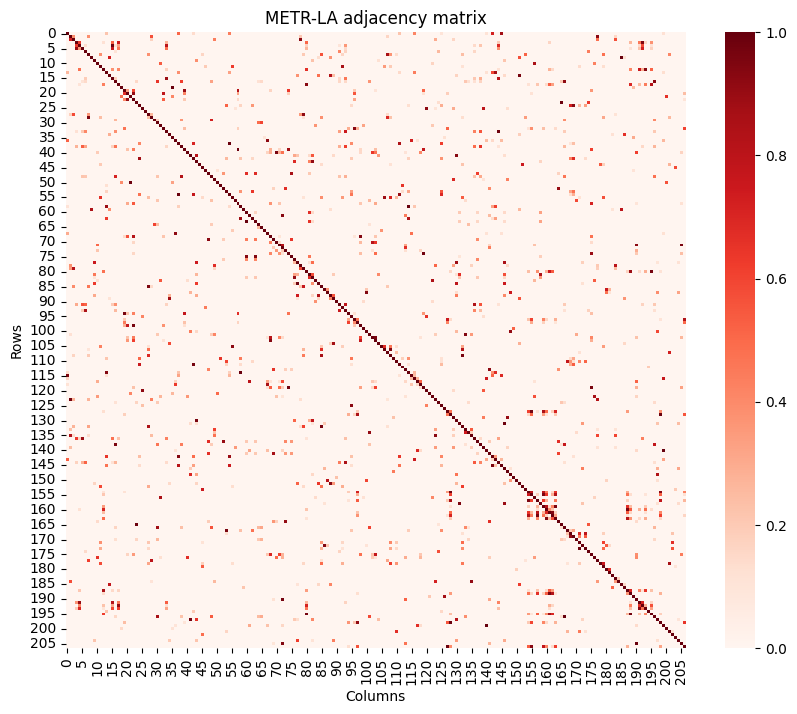

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns 

# 这里使用seaborn库的heatmap函数来绘制热图，可以根据数据的值来着色
plt.figure(figsize=(10, 8))  # 可选的，设置图形的大小

# cmap参数可以用于指定颜色映射，这里选择红色越深的颜色映射
sns.heatmap(adj, cmap="Reds", annot=False)  # annot=False表示不显示数值标签，如果需要显示可以设置为True

plt.title("METR-LA adjacency matrix")  # 设置图形标题
plt.xlabel("Columns")  # 设置X轴标签
plt.ylabel("Rows")  # 设置Y轴标签

plt.show()  # 显示热图